### Import Libraries

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from analytics import SQLClient

### Connect to MySQL database

In [3]:
username = "privateuser"
password = "1234567"
port = 7777

client = SQLClient(username, password, port)

In [4]:
sql_tmp = """
    SELECT 
        id
        ,userID
        ,name
        ,type
        ,-price * count AS price
        ,count
        ,currency
        ,-priceCNY * count AS priceCNY
        ,time 
    FROM items 
    WHERE userID LIKE '%%shawlu%%' 
        AND time BETWEEN '$start_dt$ 00:00:00' AND '$end_dt$ 00:00:00' 
        AND deleted = 0
    ORDER BY time;"""

### Analytics: Nov. 2018

In [5]:
start_dt = '2018-11-01'
end_dt = '2018-12-01'
df = client.query(sql_tmp.replace('$start_dt$', start_dt).replace("$end_dt$", end_dt))

In [6]:
df = df.groupby(['type']).sum()
total = np.sum(df.price)
df["pct"] = df.price / total
df["category"] = client.categories
df = df.sort_values("pct")[::-1]
df

,id,price,count,priceCNY,pct,category
type,,,,,,
EDU,7206,3999.99,2,27488.73,0.605933,Education
HOU,3611,1213.96,1,8342.58,0.183895,Housing
FOO,160561,433.27,49,2977.56,0.065633,Food
CLO,3607,194.03,1,1333.41,0.029392,Clothes
INS,6498,144.83,2,995.30,0.021939,Insurance
ELE,7285,128.34,2,881.98,0.019441,Electronics
FUR,10948,102.57,3,704.89,0.015538,Furniture
AUT,10866,90.47,3,621.73,0.013705,Automobile
MIS,10903,73.23,3,503.24,0.011093,Miscellany


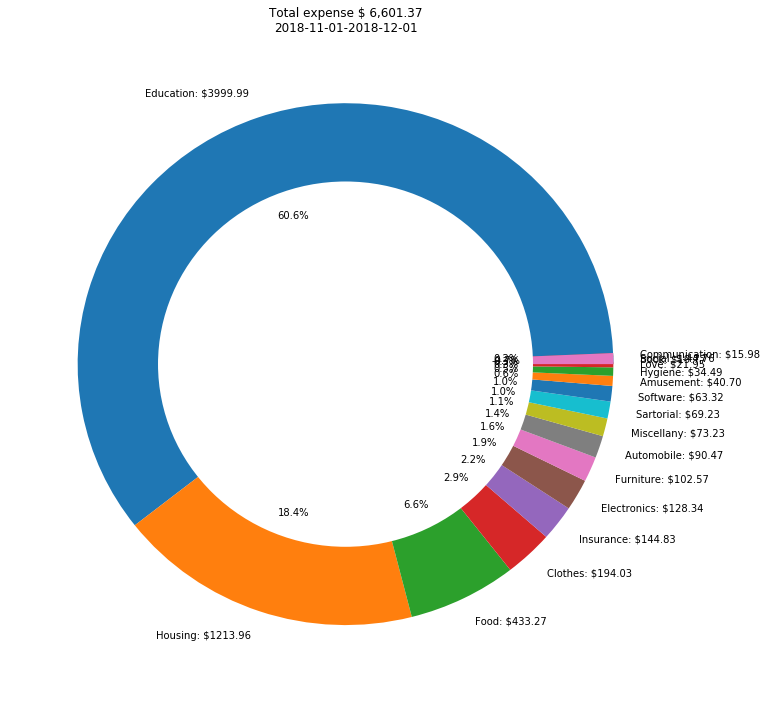

In [7]:
labels = ["%s: $%.2f"%(df.category.values[i],
             df.price.values[i]) for i in range(len(df))]

plt.figure(figsize=(12, 12))

title = "Total expense %s\n%s-%s"%('$ {:,.2f}'.format(total), start_dt, end_dt)
plt.title(title)

_ = plt.pie(x = df.price.values, 
            labels = labels,
            autopct='%1.1f%%',
            labeldistance = 1.1)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig("month.png")

### Analytics: Year of 2018

In [8]:
start_dt = '2018-01-01'
end_dt = '2018-12-01'
df = client.query(sql_tmp.replace('$start_dt$', start_dt).replace("$end_dt$", end_dt))

In [9]:
df = df.groupby(['type']).sum()
total = np.sum(df.price)
df["pct"] = df.price / total
df["category"] = client.categories
df = df.sort_values("pct")[::-1]
df

,id,price,count,priceCNY,pct,category
type,,,,,,
EDU,67321,32556.62,22,214942.66,0.304779,Education
HOU,59645,15676.56,20,105122.63,0.146756,Housing
INV,3618,13972.25,1,96020.10,0.130801,Investment
COM,86059,11484.50,29,1736.43,0.107512,Communication
AUT,111260,11170.56,34,76726.55,0.104573,Automobile
FOO,832115,4314.94,631,29375.83,0.040394,Food
INS,44492,3876.75,15,25335.59,0.036292,Insurance
CLO,60522,2145.20,23,14553.46,0.020082,Clothes
FUR,257565,2016.03,85,13815.10,0.018873,Furniture


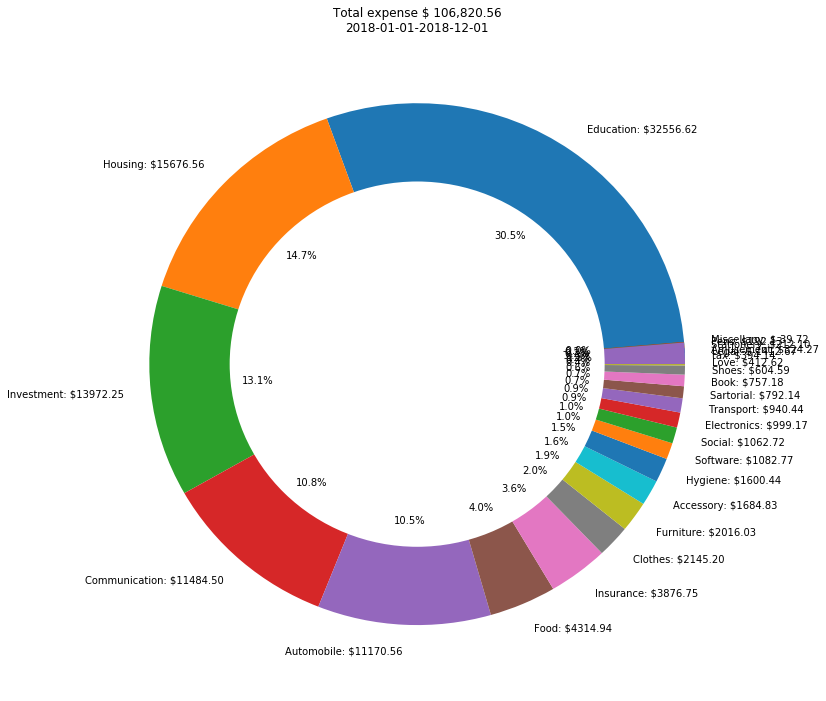

In [10]:
labels = ["%s: $%.2f"%(df.category.values[i],
             df.price.values[i]) for i in range(len(df))]

plt.figure(figsize=(12, 12))

title = "Total expense %s\n%s-%s"%('$ {:,.2f}'.format(total), start_dt, end_dt)
plt.title(title)

_ = plt.pie(x = df.price.values, 
            labels = labels,
            autopct='%1.1f%%',
            labeldistance = 1.1)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig("year.png")